<b>Prepare Association rules<br>
<b>1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values<br>
<b>2) Change the minimum length in apriori algorithm<br>
<b>3) Visulize the obtained rules using different plots 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Association Rules\book.csv')

In [3]:
data.head()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0

<b>EDA

In [4]:
data.describe(include='all')

ChildBks     YouthBks     CookBks     DoItYBks       RefBks  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean      0.423000     0.247500     0.43100     0.282000     0.214500   
std       0.494159     0.431668     0.49534     0.450086     0.410578   
min       0.000000     0.000000     0.00000     0.000000     0.000000   
25%       0.000000     0.000000     0.00000     0.000000     0.000000   
50%       0.000000     0.000000     0.00000     0.000000     0.000000   
75%       1.000000     0.000000     1.00000     1.000000     0.000000   
max       1.000000     1.000000     1.00000     1.000000     1.000000   

            ArtBks      GeogBks     ItalCook    ItalAtlas      ItalArt  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.241000     0.276000     0.113500     0.037000     0.048500   
std       0.427797     0.447129     0.317282     0.188809     0.214874   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Florence  
count  2000.000000  
mean      0.108500  
std       0.311089  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [5]:
data.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
data.sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

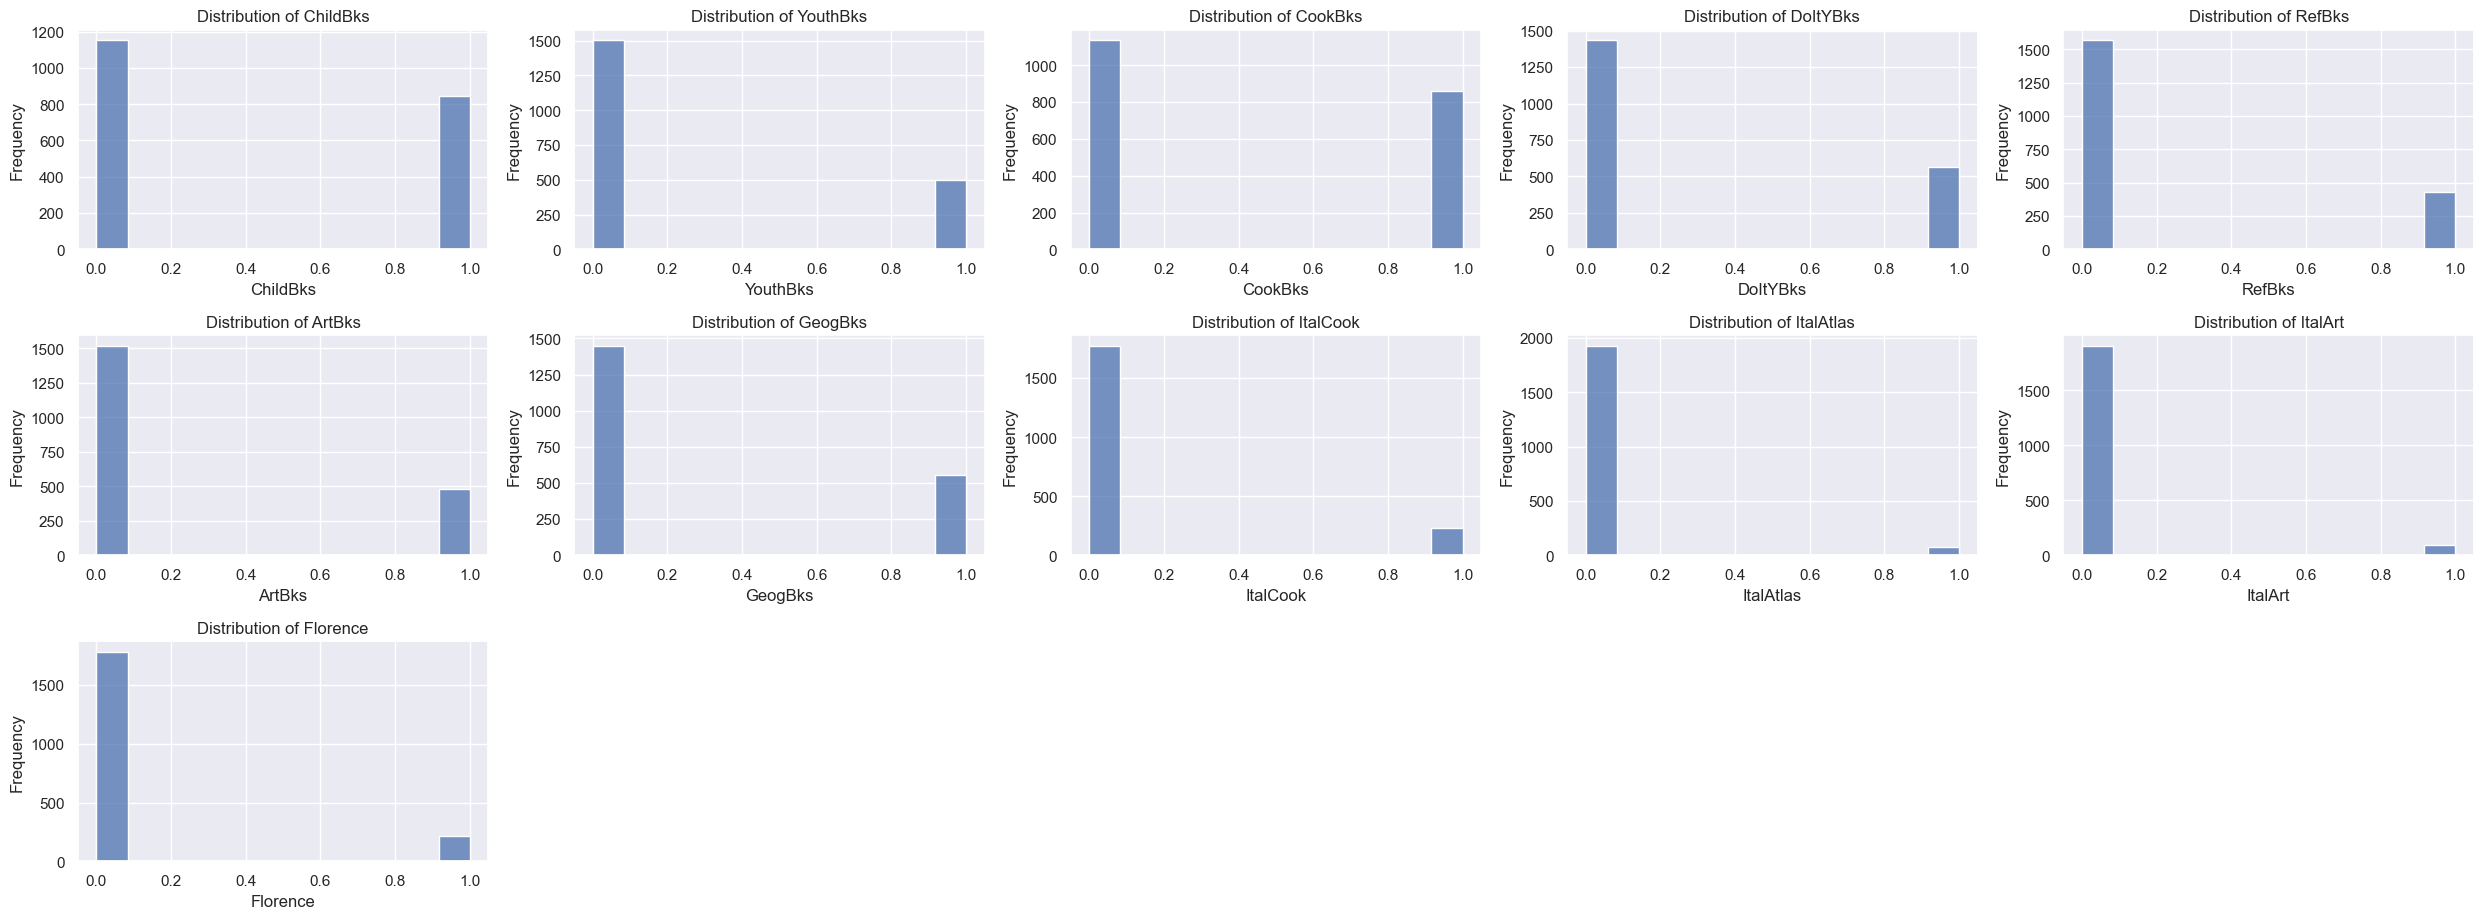

In [7]:
#Visualization of Ditribution of data
plt.figure(figsize=(25,15))
for i,col in enumerate(data.columns,start=1):
    plt.subplot(5,5,i)
    sns.histplot(data[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [8]:
import plotly.io as pio
pio.renderers.default='notebook'

In [9]:
import warnings
warnings.filterwarnings("ignore")  #Ignore warnings

In [10]:
#Visualization of Books Sales.
import plotly.express as px
fig = px.bar(data.sum(),title='Sales of Books')
fig.update_layout(xaxis_title='Books',yaxis_title='Frequency')
fig.show()

<b>Association Rule Mining Algorithim

In [11]:
#pip install mlxtend

In [12]:
#Apriori Alogorithim
from mlxtend.frequent_patterns import apriori,association_rules

In [13]:
#Support = 10%
frequent_itemset = apriori(data,min_support=0.1,use_colnames=True)
frequent_itemset

D:\Anaconda\Installation\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (CookBks, ChildBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (RefBks, ChildBks)
13   0.1625             (ArtBks, ChildBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (YouthBks, DoItYBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (YouthBks, GeogBks)
19   0.1875            (CookBks, DoItYBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (CookBks, GeogBks)
23   0.1135            (CookBks, ItalCook)
24   0.1055             (RefBks, DoItYBks)
25   0.1235             (ArtBks, DoItYBks)
26   0.1325            (GeogBks, DoItYBks)
27   0.1105              (RefBks, GeogBks)
28   0.1275              (ArtBks, GeogBks)
29   0.1290  (YouthBks, CookBks, ChildBks)
30   0.1460  (DoItYBks, CookBks, ChildBks)
31   0.1225    (RefBks, CookBks, ChildBks)
32   0.1265    (ArtBks, CookBks, ChildBks)
33   0.1495   (CookBks, GeogBks, ChildBks)
34   0.1045  (DoItYBks, GeogBks, ChildBks)
35   0.1020    (ArtBks, GeogBks, ChildBks)
36   0.1015    (ArtBks, CookBks, DoItYBks)
37   0.1085   (CookBks, GeogBks, DoItYBks)
38   0.1035     (ArtBks, CookBks, GeogBks)

In [14]:
#Lets add a length column 
frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x :len(x))
frequent_itemset

support                       itemsets  length
0    0.4230                     (ChildBks)       1
1    0.2475                     (YouthBks)       1
2    0.4310                      (CookBks)       1
3    0.2820                     (DoItYBks)       1
4    0.2145                       (RefBks)       1
5    0.2410                       (ArtBks)       1
6    0.2760                      (GeogBks)       1
7    0.1135                     (ItalCook)       1
8    0.1085                     (Florence)       1
9    0.1650           (YouthBks, ChildBks)       2
10   0.2560            (CookBks, ChildBks)       2
11   0.1840           (DoItYBks, ChildBks)       2
12   0.1515             (RefBks, ChildBks)       2
13   0.1625             (ArtBks, ChildBks)       2
14   0.1950            (GeogBks, ChildBks)       2
15   0.1620            (YouthBks, CookBks)       2
16   0.1155           (YouthBks, DoItYBks)       2
17   0.1010             (YouthBks, ArtBks)       2
18   0.1205            (YouthBks, GeogBks)       2
19   0.1875            (CookBks, DoItYBks)       2
20   0.1525              (RefBks, CookBks)       2
21   0.1670              (ArtBks, CookBks)       2
22   0.1925             (CookBks, GeogBks)       2
23   0.1135            (CookBks, ItalCook)       2
24   0.1055             (RefBks, DoItYBks)       2
25   0.1235             (ArtBks, DoItYBks)       2
26   0.1325            (GeogBks, DoItYBks)       2
27   0.1105              (RefBks, GeogBks)       2
28   0.1275              (ArtBks, GeogBks)       2
29   0.1290  (YouthBks, CookBks, ChildBks)       3
30   0.1460  (DoItYBks, CookBks, ChildBks)       3
31   0.1225    (RefBks, CookBks, ChildBks)       3
32   0.1265    (ArtBks, CookBks, ChildBks)       3
33   0.1495   (CookBks, GeogBks, ChildBks)       3
34   0.1045  (DoItYBks, GeogBks, ChildBks)       3
35   0.1020    (ArtBks, GeogBks, ChildBks)       3
36   0.1015    (ArtBks, CookBks, DoItYBks)       3
37   0.1085   (CookBks, GeogBks, DoItYBks)       3
38   0.1035     (ArtBks, CookBks, GeogBks)       3

In [15]:
frequent_itemset['length'].value_counts()

2    20
3    10
1     9
Name: length, dtype: int64

In [16]:
#let us apply rules for +ve association i.e lift>1
rules1 = association_rules(frequent_itemset,metric='lift',min_threshold=1.2)
rules1

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2            (CookBks)          (ChildBks)              0.4310   
3           (ChildBks)           (CookBks)              0.4230   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, GeogBks)           (CookBks)              0.1275   
96  (CookBks, GeogBks)            (ArtBks)              0.1925   
97            (ArtBks)  (CookBks, GeogBks)              0.2410   
98           (CookBks)   (ArtBks, GeogBks)              0.4310   
99           (GeogBks)   (ArtBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750   
2               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069   
3               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240   
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347   
..                 ...      ...         ...       ...       ...         ...   
95              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812   
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657   
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327   
98              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237   
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800   

    zhangs_metric  
0        0.485714  
1        0.633449  
2        0.505870  
3        0.498856  
4        0.489842  
..            ...  
95       0.537602  
96       0.683298  
97       0.726961  
98       0.824355  
99       0.766114  

[100 rows x 10 columns]

In [17]:
rules1.sort_values('lift',ascending=False)
rules1['length'] = rules1['antecedents'].apply(lambda x: len(x))
rules1

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2            (CookBks)          (ChildBks)              0.4310   
3           (ChildBks)           (CookBks)              0.4230   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, GeogBks)           (CookBks)              0.1275   
96  (CookBks, GeogBks)            (ArtBks)              0.1925   
97            (ArtBks)  (CookBks, GeogBks)              0.2410   
98           (CookBks)   (ArtBks, GeogBks)              0.4310   
99           (GeogBks)   (ArtBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750   
2               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069   
3               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240   
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347   
..                 ...      ...         ...       ...       ...         ...   
95              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812   
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657   
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327   
98              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237   
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800   

    zhangs_metric  length  
0        0.485714       1  
1        0.633449       1  
2        0.505870       1  
3        0.498856       1  
4        0.489842       1  
..            ...     ...  
95       0.537602       2  
96       0.683298       2  
97       0.726961       1  
98       0.824355       1  
99       0.766114       1  

[100 rows x 11 columns]

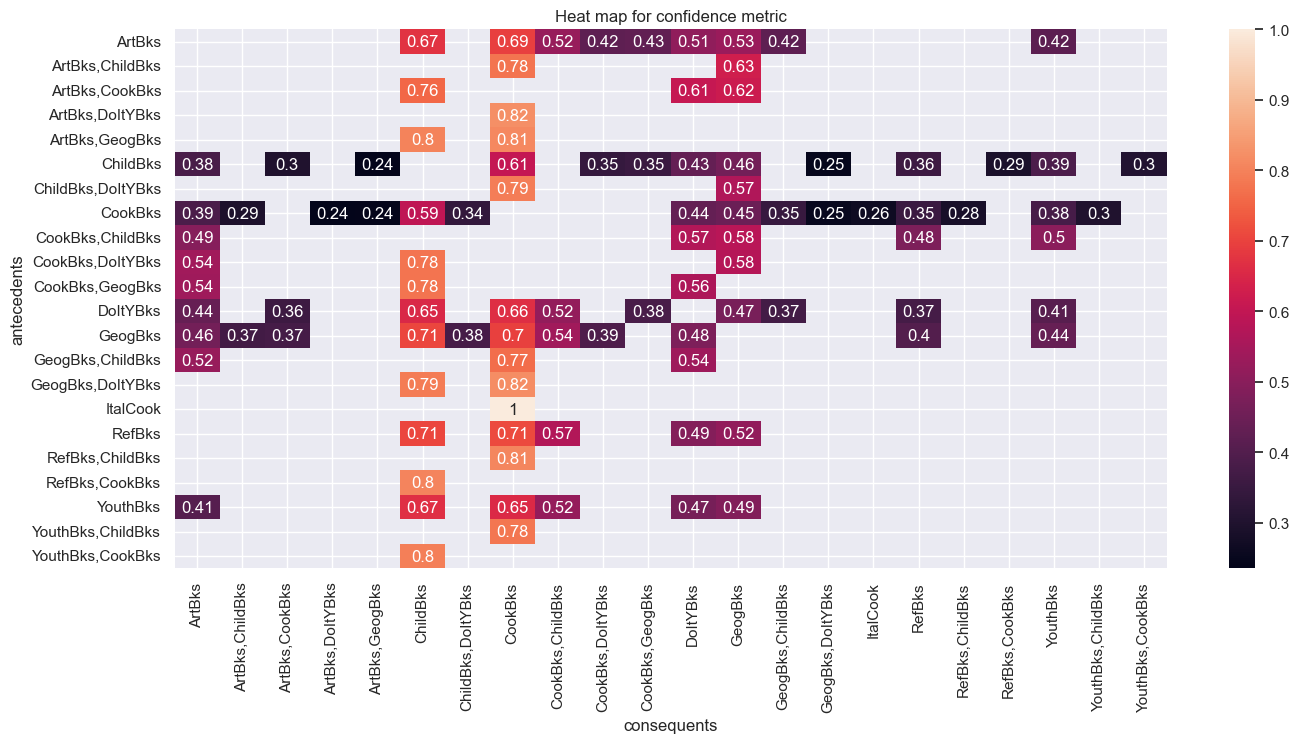

In [18]:
rules1['antecedents'] = rules1['antecedents'].apply(lambda a: ",".join(list(a)))
rules1['consequents'] = rules1['consequents'].apply(lambda a: ",".join(list(a)))
pivot= rules1[rules1['length']>0].pivot(index='antecedents',columns='consequents',values='confidence')
plt.figure(figsize=(16,7))
sns.heatmap(pivot,annot=True)
plt.title('Heat map for confidence metric')
plt.xticks(rotation=90)
plt.show()

In [19]:
px.scatter(rules1,x='support',y='confidence',color='lift',size='zhangs_metric')

D:\Anaconda\Installation\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\Installation\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<b>Obervations:<br>
<b>Italian Cook books and Cook book have a confidence value = 1<br>
<b>Therefore, Everyone who bought a italian cooking book will buy cooking book.

In [20]:
#Let us change the metric to confidence
frequent_itemset2 = apriori(data,min_support=0.1,use_colnames=True)

D:\Anaconda\Installation\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [21]:
rules2= association_rules(frequent_itemset2,metric='confidence',min_threshold=0.5)

In [22]:
rules2['length']=rules2['antecedents'].apply(lambda x: len(x))
rules2

antecedents          consequents  antecedent support  \
0             (YouthBks)           (ChildBks)              0.2475   
1              (CookBks)           (ChildBks)              0.4310   
2             (ChildBks)            (CookBks)              0.4230   
3             (DoItYBks)           (ChildBks)              0.2820   
4               (RefBks)           (ChildBks)              0.2145   
5               (ArtBks)           (ChildBks)              0.2410   
6              (GeogBks)           (ChildBks)              0.2760   
7             (YouthBks)            (CookBks)              0.2475   
8             (DoItYBks)            (CookBks)              0.2820   
9               (RefBks)            (CookBks)              0.2145   
10              (ArtBks)            (CookBks)              0.2410   
11             (GeogBks)            (CookBks)              0.2760   
12            (ItalCook)            (CookBks)              0.1135   
13              (ArtBks)           (DoItYBks)              0.2410   
14              (RefBks)            (GeogBks)              0.2145   
15              (ArtBks)            (GeogBks)              0.2410   
16   (YouthBks, CookBks)           (ChildBks)              0.1620   
17  (YouthBks, ChildBks)            (CookBks)              0.1650   
18   (CookBks, ChildBks)           (YouthBks)              0.2560   
19            (YouthBks)  (CookBks, ChildBks)              0.2475   
20   (CookBks, DoItYBks)           (ChildBks)              0.1875   
21  (ChildBks, DoItYBks)            (CookBks)              0.1840   
22   (CookBks, ChildBks)           (DoItYBks)              0.2560   
23            (DoItYBks)  (CookBks, ChildBks)              0.2820   
24     (RefBks, CookBks)           (ChildBks)              0.1525   
25    (RefBks, ChildBks)            (CookBks)              0.1515   
26              (RefBks)  (CookBks, ChildBks)              0.2145   
27     (ArtBks, CookBks)           (ChildBks)              0.1670   
28    (ArtBks, ChildBks)            (CookBks)              0.1625   
29              (ArtBks)  (CookBks, ChildBks)              0.2410   
30    (CookBks, GeogBks)           (ChildBks)              0.1925   
31   (CookBks, ChildBks)            (GeogBks)              0.2560   
32   (GeogBks, ChildBks)            (CookBks)              0.1950   
33             (GeogBks)  (CookBks, ChildBks)              0.2760   
34   (GeogBks, DoItYBks)           (ChildBks)              0.1325   
35  (ChildBks, DoItYBks)            (GeogBks)              0.1840   
36   (GeogBks, ChildBks)           (DoItYBks)              0.1950   
37     (ArtBks, GeogBks)           (ChildBks)              0.1275   
38    (ArtBks, ChildBks)            (GeogBks)              0.1625   
39   (GeogBks, ChildBks)             (ArtBks)              0.1950   
40     (ArtBks, CookBks)           (DoItYBks)              0.1670   
41    (ArtBks, DoItYBks)            (CookBks)              0.1235   
42   (CookBks, DoItYBks)             (ArtBks)              0.1875   
43    (CookBks, GeogBks)           (DoItYBks)              0.1925   
44   (CookBks, DoItYBks)            (GeogBks)              0.1875   
45   (GeogBks, DoItYBks)            (CookBks)              0.1325   
46     (ArtBks, CookBks)            (GeogBks)              0.1670   
47     (ArtBks, GeogBks)            (CookBks)              0.1275   
48    (CookBks, GeogBks)             (ArtBks)              0.1925   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
1               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069   
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240   
3               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347   
4               0.4230   0.1515    0.706294  1.669725  0.060767    1.964548   
5               0.4230   0.1625    0.674274  1.594028  0.060557    1.771427   
6        

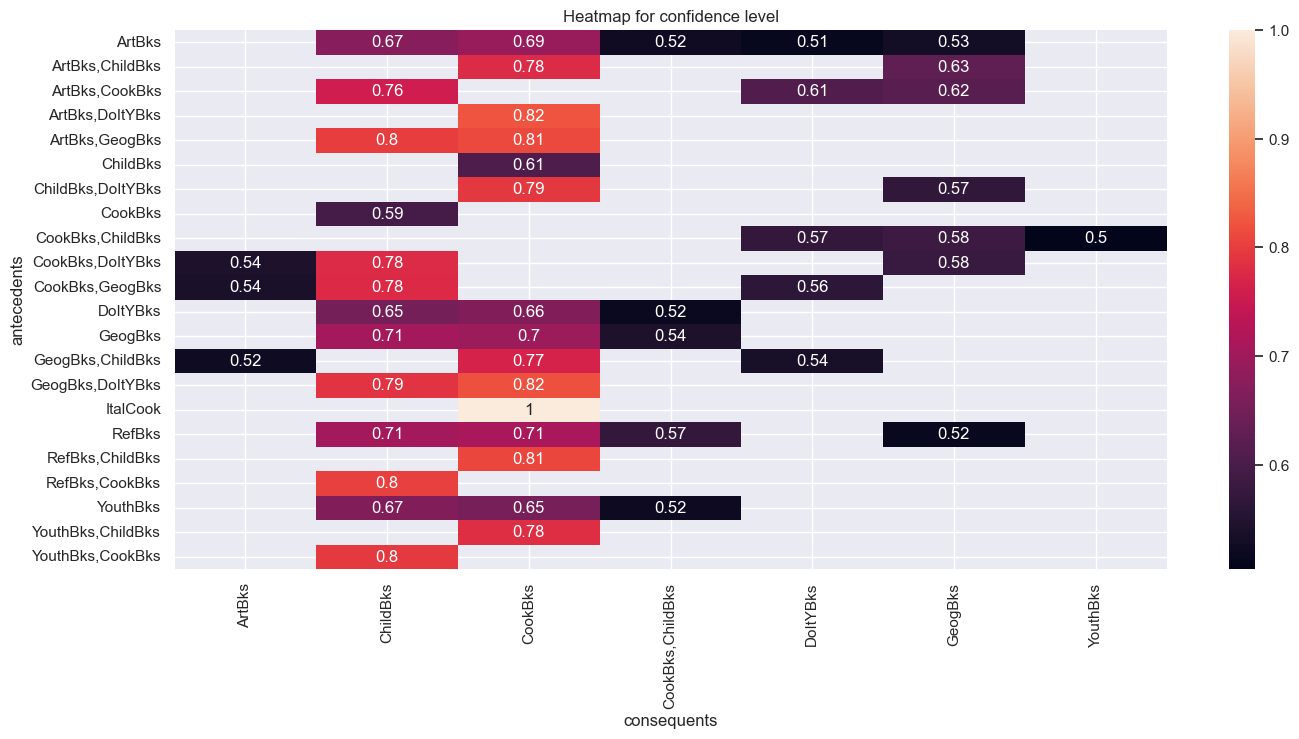

In [23]:
rules2['antecedents'] = rules2['antecedents'].apply(lambda a: ','.join(list(a)))
rules2['consequents'] = rules2['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules2[rules2['length']>0].pivot(index='antecedents',columns='consequents',values='confidence')
plt.figure(figsize=(16,7))
sns.heatmap(pivot,annot=True)
plt.title('Heatmap for confidence level')
plt.xticks(rotation=90)
plt.show()

In [24]:
px.scatter(rules2,x='support',y='confidence',color='lift',size='zhangs_metric')

D:\Anaconda\Installation\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\Installation\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<b>Obervations:<br>
<b>Again Italian Cook books and Cook book have a confidence value = 1

In [25]:
#Let us check the Association for 2 group of antecedents
frequent_itemset2['length'] = frequent_itemset2['itemsets'].apply(lambda x: len(x))
frequent_itemset3 = frequent_itemset2[frequent_itemset2['length']==2]
frequent_itemset3

support              itemsets  length
9    0.1650  (YouthBks, ChildBks)       2
10   0.2560   (CookBks, ChildBks)       2
11   0.1840  (DoItYBks, ChildBks)       2
12   0.1515    (RefBks, ChildBks)       2
13   0.1625    (ArtBks, ChildBks)       2
14   0.1950   (GeogBks, ChildBks)       2
15   0.1620   (YouthBks, CookBks)       2
16   0.1155  (YouthBks, DoItYBks)       2
17   0.1010    (YouthBks, ArtBks)       2
18   0.1205   (YouthBks, GeogBks)       2
19   0.1875   (CookBks, DoItYBks)       2
20   0.1525     (RefBks, CookBks)       2
21   0.1670     (ArtBks, CookBks)       2
22   0.1925    (CookBks, GeogBks)       2
23   0.1135   (CookBks, ItalCook)       2
24   0.1055    (RefBks, DoItYBks)       2
25   0.1235    (ArtBks, DoItYBks)       2
26   0.1325   (GeogBks, DoItYBks)       2
27   0.1105     (RefBks, GeogBks)       2
28   0.1275     (ArtBks, GeogBks)       2

In [26]:
#in case of frozen set use support_only=True  :A frozen set wont be having atecedents/consequent part
rules3 = association_rules(frequent_itemset3,metric='confidence',min_threshold=0.5,support_only=True)

In [27]:
rules3

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

<b>No Association is found,so lets continue futher

In [28]:
#let us build a Association with min_support =0.1 and antecedent length =2
frequent_itemset4 = apriori(data,min_support=0.1,use_colnames=True)
rules4 = association_rules(frequent_itemset4)
rules4['length'] = rules4['antecedents'].apply(lambda x: len(x))
rules5 = rules4[rules4['length']>1]
rules5

D:\Anaconda\Installation\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents consequents  antecedent support  consequent support  \
1    (RefBks, CookBks)  (ChildBks)              0.1525               0.423   
2   (RefBks, ChildBks)   (CookBks)              0.1515               0.431   
3   (ArtBks, DoItYBks)   (CookBks)              0.1235               0.431   
4  (GeogBks, DoItYBks)   (CookBks)              0.1325               0.431   
5    (ArtBks, GeogBks)   (CookBks)              0.1275               0.431   

   support  confidence      lift  leverage  conviction  zhangs_metric  length  
1   0.1225    0.803279  1.899004  0.057993    2.933083       0.558594       2  
2   0.1225    0.808581  1.876058  0.057204    2.972534       0.550345       2  
3   0.1015    0.821862  1.906873  0.048272    3.194159       0.542591       2  
4   0.1085    0.818868  1.899926  0.051392    3.141354       0.546010       2  
5   0.1035    0.811765  1.883445  0.048547    3.022812       0.537602       2

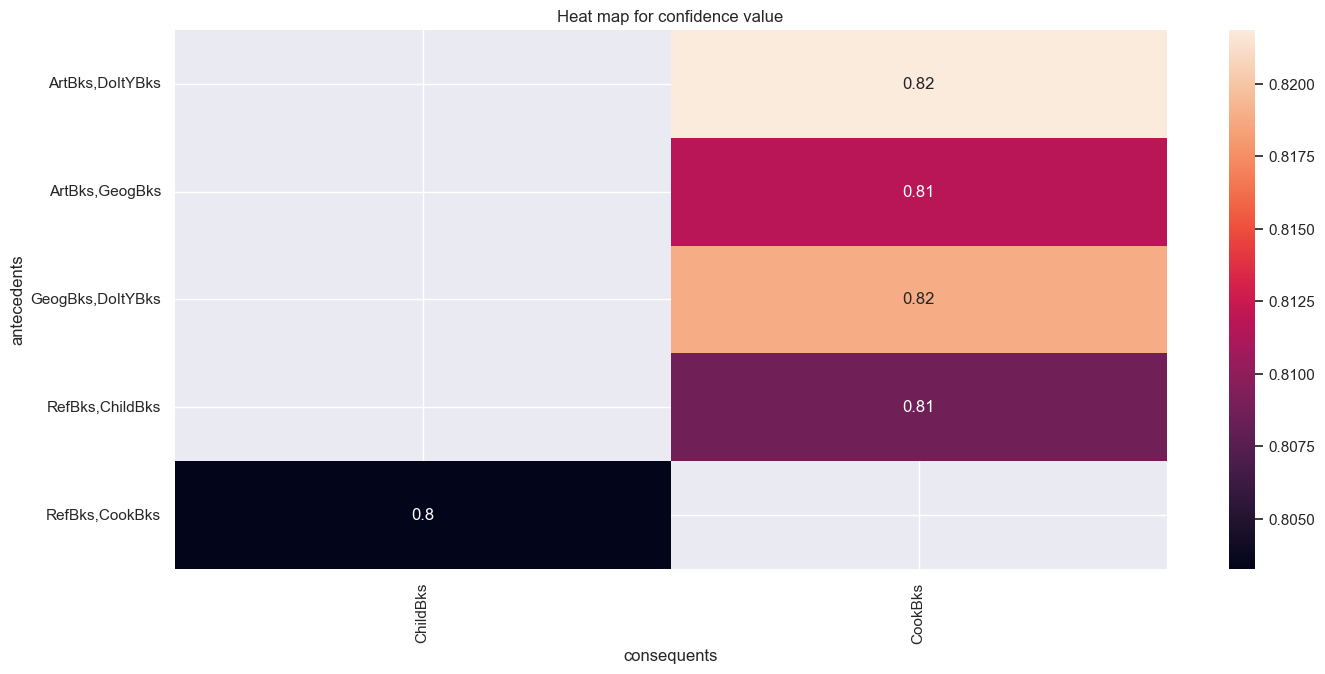

In [29]:
rules5['antecedents'] = rules5['antecedents'].apply(lambda a: ','.join(list(a)))
rules5['consequents'] = rules5['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules5[rules5['length']>0].pivot(index='antecedents',columns='consequents',values='confidence')
plt.figure(figsize=(16,7))
sns.heatmap(pivot,annot=True)
plt.title('Heat map for confidence value')
plt.xticks(rotation=90)
plt.show()

<b>Above plot shows that cooking books acts as a major consequents for a set of antecedents as shown above. 

<b>Conclusion:<br>
<b>1.Cooking books are one of the major consequents books.<br>
<b>2.Italian cooking books and cooking books are one of the most bought together books.

<-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------->

<b><h1>MOVIE DATASET

In [30]:
data_2 = pd.read_csv(r'D:\Excelr Data Science assignment\Association Rules\my_movies.csv')

In [31]:
data_2.head()

V1       V2             V3          V4     V5  Sixth Sense  \
0  Sixth Sense    LOTR1  Harry Potter1  Green Mile  LOTR2            1   
1    Gladiator  Patriot     Braveheart         NaN    NaN            0   
2        LOTR1    LOTR2            NaN         NaN    NaN            0   
3    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   
4    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   

   Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  \
0          0      1              1        0      1              0     0   
1          1      0              0        1      0              0     0   
2          0      1              0        0      1              0     0   
3          1      0              0        1      0              0     0   
4          1      0              0        1      0              0     0   

   Braveheart  Green Mile  
0           0           1  
1           1           0  
2           0           0  
3           0           0  
4           0           0

<b>EDA

In [32]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [33]:
data_2.describe(include='all')

V1       V2           V3          V4     V5  Sixth Sense  \
count          10       10            7           2      1    10.000000   
unique          4        5            4           1      1          NaN   
top     Gladiator  Patriot  Sixth Sense  Green Mile  LOTR2          NaN   
freq            6        6            4           2      1          NaN   
mean          NaN      NaN          NaN         NaN    NaN     0.600000   
std           NaN      NaN          NaN         NaN    NaN     0.516398   
min           NaN      NaN          NaN         NaN    NaN     0.000000   
25%           NaN      NaN          NaN         NaN    NaN     0.000000   
50%           NaN      NaN          NaN         NaN    NaN     1.000000   
75%           NaN      NaN          NaN         NaN    NaN     1.000000   
max           NaN      NaN          NaN         NaN    NaN     1.000000   

        Gladiator      LOTR1  Harry Potter1    Patriot      LOTR2  \
count   10.000000  10.000000      10.000000  10.000000  10.000000   
unique        NaN        NaN            NaN        NaN        NaN   
top           NaN        NaN            NaN        NaN        NaN   
freq          NaN        NaN            NaN        NaN        NaN   
mean     0.700000   0.200000       0.200000   0.600000   0.200000   
std      0.483046   0.421637       0.421637   0.516398   0.421637   
min      0.000000   0.000000       0.000000   0.000000   0.000000   
25%      0.250000   0.000000       0.000000   0.000000   0.000000   
50%      1.000000   0.000000       0.000000   1.000000   0.000000   
75%      1.000000   0.000000       0.000000   1.000000   0.000000   
max      1.000000   1.000000       1.000000   1.000000   1.000000   

        Harry Potter2       LOTR  Braveheart  Green Mile  
count       10.000000  10.000000   10.000000   10.000000  
unique            NaN        NaN         NaN         NaN  
top               NaN        NaN         NaN         NaN  
freq              NaN        NaN         NaN         NaN  
mean         0.100000   0.100000    0.100000    0.200000  
std          0.316228   0.316228    0.316228    0.421637  
min          0.000000   0.000000    0.000000    0.000000  
25%          0.000000   0.000000    0.000000    0.000000  
50%          0.000000   0.000000    0.000000    0.000000  
75%          0.000000   0.000000    0.000000    0.000000  
max          1.000000   1.000000    1.000000    1.000000

In [34]:
data_2.shape

(10, 15)

In [35]:
data_3 = data_2.iloc[:,5:]
data_3

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

<b>MODEL BUILDING

In [36]:
#Rule 1 with support = 0.1,metric= 'lift',Threshold=1.2
frequent_itemsets1 = apriori(data_3,min_support=0.1,use_colnames=True)
rule1 = association_rules(frequent_itemsets1,metric='lift',min_threshold=1.2)
rule1['length'] = rule1['antecedents'].apply(lambda x: len(x))
rule1

D:\Anaconda\Installation\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents                                      consequents  \
0      (Sixth Sense)                                           (LOTR)   
1             (LOTR)                                    (Sixth Sense)   
2       (Green Mile)                                    (Sixth Sense)   
3      (Sixth Sense)                                     (Green Mile)   
4          (Patriot)                                      (Gladiator)   
..               ...                                              ...   
225          (LOTR2)  (Green Mile, Sixth Sense, Harry Potter1, LOTR1)   
226    (Sixth Sense)        (Green Mile, LOTR1, LOTR2, Harry Potter1)   
227  (Harry Potter1)          (Green Mile, Sixth Sense, LOTR2, LOTR1)   
228          (LOTR1)  (Green Mile, Sixth Sense, LOTR2, Harry Potter1)   
229     (Green Mile)       (LOTR1, Sixth Sense, LOTR2, Harry Potter1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.1      0.1    0.166667  1.666667   
1                   0.1                 0.6      0.1    1.000000  1.666667   
2                   0.2                 0.6      0.2    1.000000  1.666667   
3                   0.6                 0.2      0.2    0.333333  1.666667   
4                   0.6                 0.7      0.6    1.000000  1.428571   
..                  ...                 ...      ...         ...       ...   
225                 0.2                 0.1      0.1    0.500000  5.000000   
226                 0.6                 0.1      0.1    0.166667  1.666667   
227                 0.2                 0.1      0.1    0.500000  5.000000   
228                 0.2                 0.1      0.1    0.500000  5.000000   
229                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  zhangs_metric  length  
0        0.04        1.08       1.000000       1  
1        0.04         inf       0.444444       1  
2        0.08         inf       0.500000       1  
3        0.08        1.20       1.000000       1  
4        0.18         inf       0.750000       1  
..        ...         ...            ...     ...  
225      0.08        1.80       1.000000       1  
226      0.04        1.08       1.000000       1  
227      0.08        1.80       1.000000       1  
228      0.08        1.80       1.000000       1  
229      0.08        1.80       1.000000       1  

[230 rows x 11 columns]

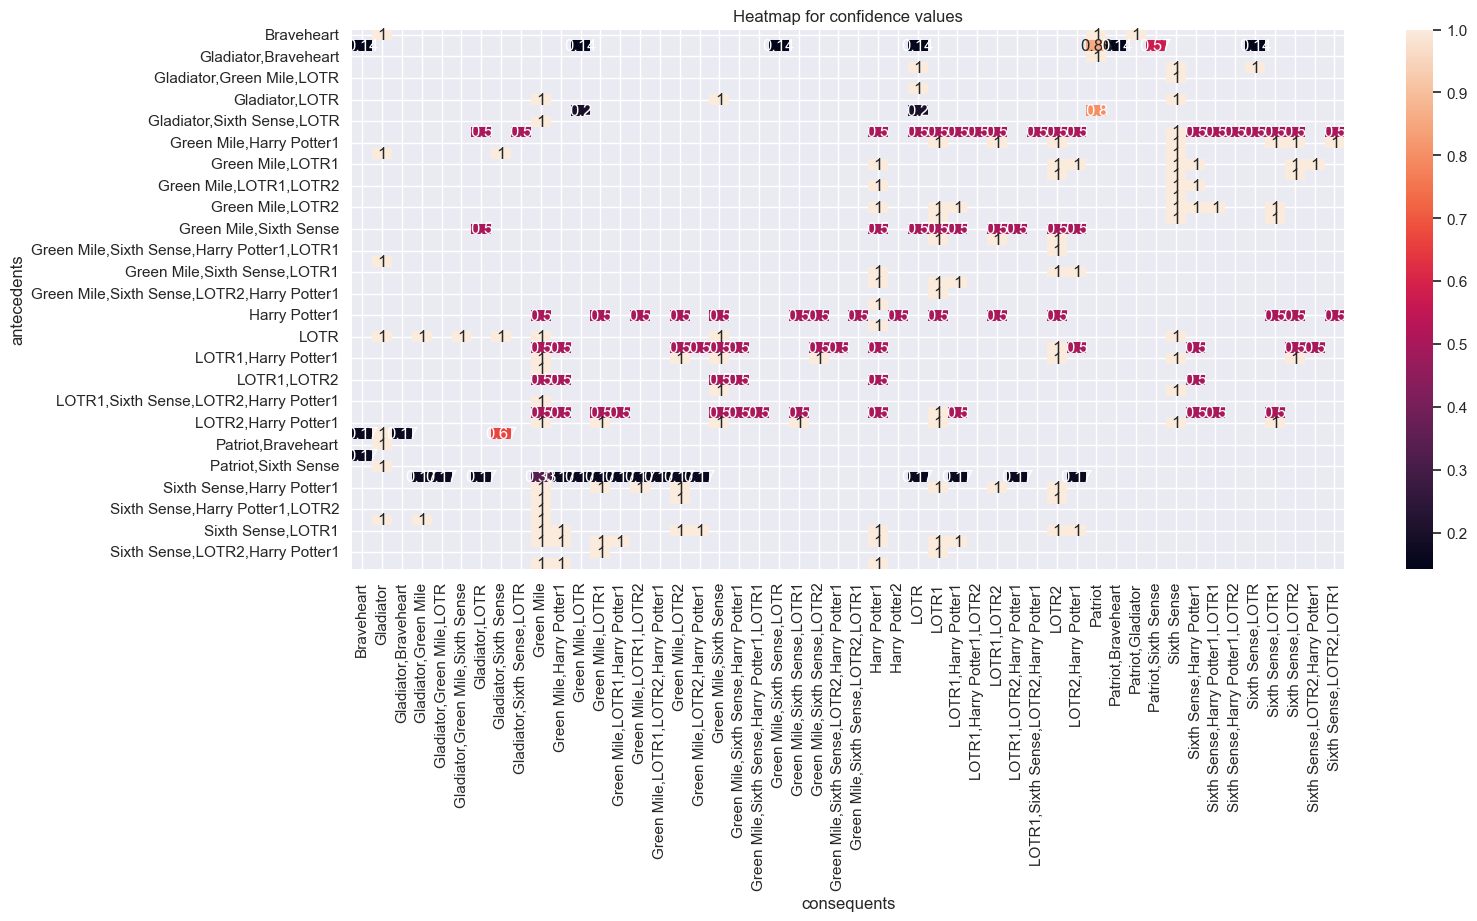

In [37]:
rule1['antecedents'] = rule1['antecedents'].apply(lambda a: ','.join(list(a)))
rule1['consequents'] = rule1['consequents'].apply(lambda a: ','.join(list(a)))
pivot= rule1[rule1['length']>0].pivot(index='antecedents',columns='consequents',values='confidence')
plt.figure(figsize=(16,7))
sns.heatmap(pivot,annot=True)
plt.title('Heatmap for confidence values')
plt.xticks(rotation=90)
plt.show()

In [38]:
px.scatter(rule1,x='support',y='confidence')

D:\Anaconda\Installation\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\Installation\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<b>There are a lot of combinations with cofidence value = 1

In [39]:
#Rule 2 with supoort = 0.5, metric='confidence' and min_threshold = 0.8 
frequent_itemsets2 = apriori(data_3,min_support=0.5,use_colnames=True)
rule2 = association_rules(frequent_itemsets2,metric='confidence',min_threshold=0.8)
rule2['length'] = rule2['antecedents'].apply(lambda x: len(x))
rule2

D:\Anaconda\Installation\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents  consequents  antecedent support  consequent support  \
0  (Sixth Sense)  (Gladiator)                 0.6                 0.7   
1      (Patriot)  (Gladiator)                 0.6                 0.7   
2    (Gladiator)    (Patriot)                 0.7                 0.6   

   support  confidence      lift  leverage  conviction  zhangs_metric  length  
0      0.5    0.833333  1.190476      0.08         1.8           0.40       1  
1      0.6    1.000000  1.428571      0.18         inf           0.75       1  
2      0.6    0.857143  1.428571      0.18         2.8           1.00       1

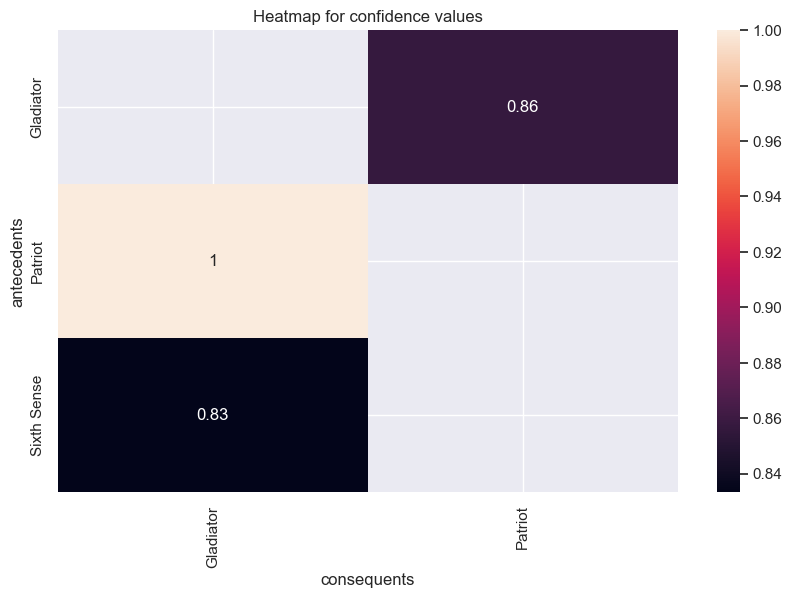

In [40]:
rule2['antecedents'] = rule2['antecedents'].apply(lambda a:','.join(list(a)))
rule2['consequents'] = rule2['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rule2[rule2['length']>0].pivot(index='antecedents',columns='consequents',values='confidence')
plt.figure(figsize=(10,6))
sns.heatmap(pivot,annot=True)
plt.title('Heatmap for confidence values')
plt.xticks(rotation=90)
plt.show()

<b>Patriot and Gladiator are most bought together movies

In [41]:
#let us test Rule 1 with antecedents length=2
rule_1a = rule1[rule1['length']==2]
rule_1a

antecedents                      consequents  \
28        Patriot,Sixth Sense                        Gladiator   
29      Gladiator,Sixth Sense                          Patriot   
32      Gladiator,Sixth Sense                             LOTR   
33             Gladiator,LOTR                      Sixth Sense   
34           Sixth Sense,LOTR                        Gladiator   
..                        ...                              ...   
220         Sixth Sense,LOTR1   Green Mile,LOTR2,Harry Potter1   
221    Green Mile,Sixth Sense        LOTR1,LOTR2,Harry Potter1   
222       LOTR1,Harry Potter1     Green Mile,Sixth Sense,LOTR2   
223  Green Mile,Harry Potter1          Sixth Sense,LOTR2,LOTR1   
224          Green Mile,LOTR1  Sixth Sense,LOTR2,Harry Potter1   

     antecedent support  consequent support  support  confidence       lift  \
28                  0.4                 0.7      0.4         1.0   1.428571   
29                  0.5                 0.6      0.4         0.8   1.333333   
32                  0.5                 0.1      0.1         0.2   2.000000   
33                  0.1                 0.6      0.1         1.0   1.666667   
34                  0.1                 0.7      0.1         1.0   1.428571   
..                  ...                 ...      ...         ...        ...   
220                 0.1                 0.1      0.1         1.0  10.000000   
221                 0.2                 0.1      0.1         0.5   5.000000   
222                 0.1                 0.1      0.1         1.0  10.000000   
223                 0.1                 0.1      0.1         1.0  10.000000   
224                 0.1                 0.1      0.1         1.0  10.000000   

     leverage  conviction  zhangs_metric  length  
28       0.12         inf       0.500000       2  
29       0.10       2.000       0.500000       2  
32       0.05       1.125       1.000000       2  
33       0.04         inf       0.444444       2  
34       0.03         inf       0.333333       2  
..        ...         ...            ...     ...  
220      0.09         inf       1.000000       2  
221      0.08       1.800       1.000000       2  
222      0.09         inf       1.000000       2  
223      0.09         inf       1.000000       2  
224      0.09         inf       1.000000       2  

[90 rows x 11 columns]

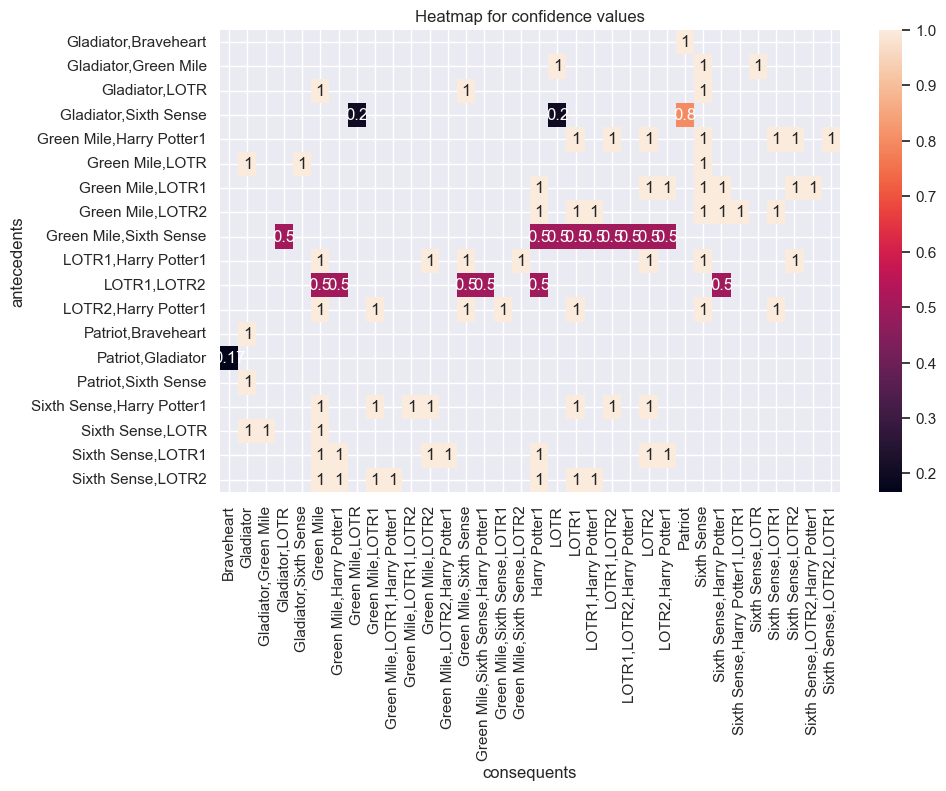

In [42]:
pivot = rule_1a[rule_1a['length']>0].pivot(index='antecedents',columns='consequents',values='confidence')
plt.figure(figsize=(10,6))
sns.heatmap(pivot,annot=True)
plt.title('Heatmap for confidence values')
plt.xticks(rotation=90)
plt.show()

<b>There are a lot of combinations with confidence=1

In [43]:
#Let us check of all antecedents with confidence=1 from Rule_1a
rule_1b = rule_1a[rule_1a['confidence']==1]
rule_1b

antecedents                      consequents  \
28         Patriot,Sixth Sense                        Gladiator   
33              Gladiator,LOTR                      Sixth Sense   
34            Sixth Sense,LOTR                        Gladiator   
38        Gladiator,Green Mile                      Sixth Sense   
40   Sixth Sense,Harry Potter1                            LOTR1   
..                         ...                              ...   
219  Sixth Sense,Harry Potter1           Green Mile,LOTR1,LOTR2   
220          Sixth Sense,LOTR1   Green Mile,LOTR2,Harry Potter1   
222        LOTR1,Harry Potter1     Green Mile,Sixth Sense,LOTR2   
223   Green Mile,Harry Potter1          Sixth Sense,LOTR2,LOTR1   
224           Green Mile,LOTR1  Sixth Sense,LOTR2,Harry Potter1   

     antecedent support  consequent support  support  confidence       lift  \
28                  0.4                 0.7      0.4         1.0   1.428571   
33                  0.1                 0.6      0.1         1.0   1.666667   
34                  0.1                 0.7      0.1         1.0   1.428571   
38                  0.1                 0.6      0.1         1.0   1.666667   
40                  0.1                 0.2      0.1         1.0   5.000000   
..                  ...                 ...      ...         ...        ...   
219                 0.1                 0.1      0.1         1.0  10.000000   
220                 0.1                 0.1      0.1         1.0  10.000000   
222                 0.1                 0.1      0.1         1.0  10.000000   
223                 0.1                 0.1      0.1         1.0  10.000000   
224                 0.1                 0.1      0.1         1.0  10.000000   

     leverage  conviction  zhangs_metric  length  
28       0.12         inf       0.500000       2  
33       0.04         inf       0.444444       2  
34       0.03         inf       0.333333       2  
38       0.04         inf       0.444444       2  
40       0.08         inf       0.888889       2  
..        ...         ...            ...     ...  
219      0.09         inf       1.000000       2  
220      0.09         inf       1.000000       2  
222      0.09         inf       1.000000       2  
223      0.09         inf       1.000000       2  
224      0.09         inf       1.000000       2  

[71 rows x 11 columns]

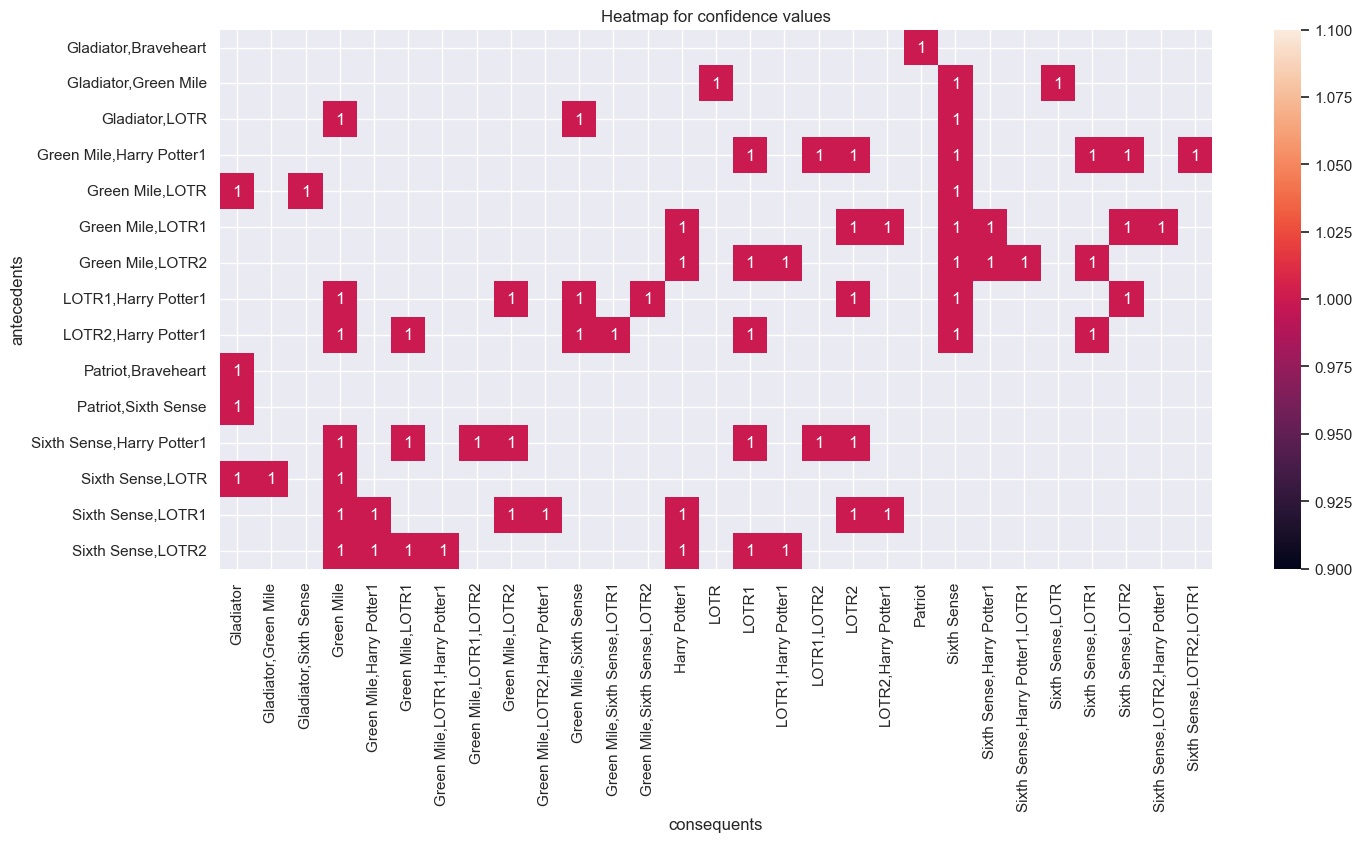

In [44]:
pivot = rule_1b[rule_1b['length']>0].pivot(index='antecedents',columns='consequents',values='confidence')
plt.figure(figsize=(16,7))
sns.heatmap(pivot,annot=True)
plt.title('Heatmap for confidence values')
plt.xticks(rotation=90)
plt.show()

<b>Summary<br>
<b>With confidence of 100% and min_length of 2, Sixth Sense is there as consequent of 8 itemsets and Green Mile as consequent of 7 itemsets